# **CS418: Rising Cost of Homes and Unaffordability - Final Report**
### BIG DATA DUNCES This is our **Github repository Link** : https://github.com/uic-ds-fall2025/class-project-big-data-dunces

---

**Team Members:**  
##Adnan  |   Phil   |   Sufyan   |   David   |   Yanja


---
## **Introduction**
---


For our data science project we analyzed why owning a home in the United States has become more unattainable. Is this due to lower financial literacy? Is this due to housing prices shooting up? Does this have something to do with income not rising at the same rate? We are investigating these questions.

Our project, **“Rising Cost of Homes and Unaffordability**,” investigates how housing affordability in the United States has evolved over time, with a focus on generational and economic factors that make homeownership increasingly unattainable; particularly for Millennials and Gen Z.

We are analyzing multiple datasets that together provide a comprehensive view of the housing market and its socioeconomic drivers:

**California Housing Dataset** – includes variables such as median income, median house value, population, and geographic coordinates, allowing us to explore spatial trends in affordability.

**NFCS State Data** – captures demographic and financial behavior at the state level, including living arrangements, marital status, and financial well-being indicators.

**Household Income Regression Dataset** – contains detailed individual-level attributes such as age, education level, occupation, income, employment status, and homeownership, which we use to identify patterns between personal characteristics and homeownership likelihood.

**New York Housing Dataset** – provides detailed listing-level data for New York, enabling localized analysis of property prices and market variations.

**Median U.S. Household Income and Median Home Price (1984–2024**) – two time-series datasets that help us analyze the long-term divergence between household earnings and home prices.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/418BigDataDunces

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/418BigDataDunces



---
## **Data Cleaning (Needed for ML/Stats)**

---


### All **cleaned datasets and code scripts** used to clean the data are available in our Github repository : https://github.com/uic-ds-fall2025/class-project-big-data-dunces

Here are the **scripts**:
https://github.com/uic-ds-fall2025/class-project-big-data-dunces/blob/main/CS418_Project_Datasets.ipynb

And here is the **updated scripts in a pdf format**:
https://github.com/uic-ds-fall2025/class-project-big-data-dunces/blob/main/Final%20report%20data%20cleaning%20scripts.pdf

## **We had to collapse data cleaning code as the pdf was getting longer than 10 pages. We do have the data scripts in our github links pasted above.**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Money_Management_and_Financial_Literacy.csv")

df_clean = df.drop(columns=[
    'X', 'Y', 'MAR_MATCHADDRESS', 'MAR_XCOORD', 'MAR_YCOORD',
    'MAR_ERROR', 'MAR_IGNORE', 'MAR_SOURCEOPERATION'
])


df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')

print(df_clean.info)
display(df_clean.head())
df_clean.to_csv('/content/Money_Management_and_Financial_Literacy_clean.csv', index=False)



<bound method DataFrame.info of    objectid          categories_of_service  \
0     14087  Bill Pay and Money Management   
1     14088    Planning for Long Term Care   
2     14089    Planning for Long Term Care   

                                        organization  \
0  East River Family Strengthening Collaborative ...   
1      Seabury Resources for Aging - Care Management   
2  Terrific, Inc. Regional Senior Services – Case...   

                                 full_address  \
0    Minnesota Avenue NE Washington, DC 20019   
1  6031 Kansas Avenue NW Washington, DC 20011   
2       1222 T Street NW Washington, DC 20009   

                                           website                      email  \
0                            https://www.erfsc.org         rpeoples@erfsc.org   
1  https://www.seaburyresources.org/caremanagement  info@seaburyresources.org   
2      https://www.terrificinc.org/senior-services       info@terrificinc.org   

           phone                    

,objectid,categories_of_service,organization,full_address,website,email,phone,service_available_to,additional_services_mayinclude,description_of_service,zipcode,mar_latitude,mar_longitude,mar_ward,mar_census_tract,mar_zipcode,marid,mar_score
0,14087,Bill Pay and Money Management,East River Family Strengthening Collaborative ...,"Minnesota Avenue NE Washington, DC 20019",https://www.erfsc.org,rpeoples@erfsc.org,202-397-7300,Services may Include: Bill Pay and Money Manag...,NaN,"Case management, Social worker, Hospice care, ...",20019,38.893815,-76.949707,Ward 7,9603,20019,29135,100
1,14088,Planning for Long Term Care,Seabury Resources for Aging - Care Management,"6031 Kansas Avenue NW Washington, DC 20011",https://www.seaburyresources.org/caremanagement,info@seaburyresources.org,202-364-0020,NaN,"Bill Pay and Money Management, Planning for Lo...",Long term care planning,20011,38.963061,-77.009317,Ward 4,9505,20011,259606,100
2,14089,Planning for Long Term Care,"Terrific, Inc. Regional Senior Services – Case...","1222 T Street NW Washington, DC 20009",https://www.terrificinc.org/senior-services,info@terrificinc.org,202-882-1160,NaN,"Bill Pay and Money Management, Planning for Lo...","Helpline, Case Management, Free Online Weekly ...",20009,38.915303,-77.028925,Ward 1,4400,20009,240851,100


In [ ]:
import pandas as pd # Loads and normalizes the column names
import numpy as np
import re

df = pd.read_csv("NFCS 2024 State Data 250623.csv")

normalized_cols = []
i = 0
while i < len(df.columns):
    name = str(df.columns[i])
    name = name.strip()
    name = re.sub(r"[^0-9a-zA-Z]+", "_", name)
    name = re.sub(r"_+", "_", name).strip("_").lower()
    normalized_cols.append(name)
    i = i + 1

df.columns = normalized_cols
print(df.shape)
df.head(3)

# Turns the survey missing codes into NaN (98, 99, 999)
col_index = 0 # Replaces the survey missing codes with NaN
while col_index < len(df.columns):
    col = df.columns[col_index]

    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].replace(98, np.nan)
        df[col] = df[col].replace(99, np.nan)
        df[col] = df[col].replace(999, np.nan)
    else:
        df[col] = df[col].replace("98", np.nan)
        df[col] = df[col].replace("99", np.nan)
        df[col] = df[col].replace("999", np.nan)
    col_index = col_index + 1

# Drops the fully empty columns after replacement
empty_cols = []
j = 0
while j < len(df.columns):
    col = df.columns[j]
    if df[col].isna().all():
        empty_cols.append(col)
    j = j + 1

if len(empty_cols) > 0:
    df = df.drop(columns=empty_cols).reset_index(drop=True)

print("Dropped empty columns:", empty_cols)

# Added actually human readable labels for key variables
# Pre created columns as the object dtype because I was getting dtype warnings
if "stateq" in df.columns:
    df["state_label"] = pd.Series([None]*len(df), dtype="object")

if "censusreg" in df.columns:
    df["region_label"] = pd.Series([None]*len(df), dtype="object")

if "a50a" in df.columns:
    df.rename(columns={"a50a": "gender_code"}, inplace=True)

if "a3ar_w" in df.columns:
    df.rename(columns={"a3ar_w": "age_group_code"}, inplace=True)

if "m9" in df.columns:
    df.rename(columns={"m9": "mortgage_knowledge_code"}, inplace=True)

if "m10" in df.columns:
    df.rename(columns={"m10": "investment_knowledge_code"}, inplace=True)

if "stateq" in df.columns: # Stateq to stateq_label
    df.loc[df["stateq"] == 1, "stateq_label"] = "Alabama"
    df.loc[df["stateq"] == 2, "stateq_label"] = "Alaska"
    df.loc[df["stateq"] == 3, "stateq_label"] = "Arizona"
    df.loc[df["stateq"] == 4, "stateq_label"] = "Arkansas"
    df.loc[df["stateq"] == 5, "stateq_label"] = "California"
    df.loc[df["stateq"] == 6, "stateq_label"] = "Colorado"
    df.loc[df["stateq"] == 7, "stateq_label"] = "Connecticut"
    df.loc[df["stateq"] == 8, "stateq_label"] = "Delaware"
    df.loc[df["stateq"] == 9, "stateq_label"] = "District of Columbia"
    df.loc[df["stateq"] == 10, "stateq_label"] = "Florida"

    df.loc[df["stateq"] == 11, "stateq_label"] = "Georgia"
    df.loc[df["stateq"] == 12, "stateq_label"] = "Hawaii"
    df.loc[df["stateq"] == 13, "stateq_label"] = "Idaho"
    df.loc[df["stateq"] == 14, "stateq_label"] = "Illinois"
    df.loc[df["stateq"] == 15, "stateq_label"] = "Indiana"
    df.loc[df["stateq"] == 16, "stateq_label"] = "Iowa"
    df.loc[df["stateq"] == 17, "stateq_label"] = "Kansas"
    df.loc[df["stateq"] == 18, "stateq_label"] = "Kentucky"
    df.loc[df["stateq"] == 19, "stateq_label"] = "Louisiana"
    df.loc[df["stateq"] == 20, "stateq_label"] = "Maine"

    df.loc[df["stateq"] == 21, "stateq_label"] = "Maryland"
    df.loc[df["stateq"] == 22, "stateq_label"] = "Massachusetts"
    df.loc[df["stateq"] == 23, "stateq_label"] = "Michigan"
    df.loc[df["stateq"] == 24, "stateq_label"] = "Minnesota"
    df.loc[df["stateq"] == 25, "stateq_label"] = "Mississippi"
    df.loc[df["stateq"] == 26, "stateq_label"] = "Missouri"
    df.loc[df["stateq"] == 27, "stateq_label"] = "Montana"
    df.loc[df["stateq"] == 28, "stateq_label"] = "Nebraska"
    df.loc[df["stateq"] == 29, "stateq_label"] = "Nevada"
    df.loc[df["stateq"] == 30, "stateq_label"] = "New Hampshire"

    df.loc[df["stateq"] == 31, "stateq_label"] = "New Jersey"
    df.loc[df["stateq"] == 32, "stateq_label"] = "New Mexico"
    df.loc[df["stateq"] == 33, "stateq_label"] = "New York"
    df.loc[df["stateq"] == 34, "stateq_label"] = "North Carolina"
    df.loc[df["stateq"] == 35, "stateq_label"] = "North Dakota"
    df.loc[df["stateq"] == 36, "stateq_label"] = "Ohio"
    df.loc[df["stateq"] == 37, "stateq_label"] = "Oklahoma"
    df.loc[df["stateq"] == 38, "stateq_label"] = "Oregon"
    df.loc[df["stateq"] == 39, "stateq_label"] = "Pennsylvania"
    df.loc[df["stateq"] == 40, "stateq_label"] = "Rhode Island"

    df.loc[df["stateq"] == 41, "stateq_label"] = "South Carolina"
    df.loc[df["stateq"] == 42, "stateq_label"] = "South Dakota"
    df.loc[df["stateq"] == 43, "stateq_label"] = "Tennessee"
    df.loc[df["stateq"] == 44, "stateq_label"] = "Texas"
    df.loc[df["stateq"] == 45, "stateq_label"] = "Utah"
    df.loc[df["stateq"] == 46, "stateq_label"] = "Vermont"
    df.loc[df["stateq"] == 47, "stateq_label"] = "Virginia"
    df.loc[df["stateq"] == 48, "stateq_label"] = "Washington"
    df.loc[df["stateq"] == 49, "stateq_label"] = "West Virginia"
    df.loc[df["stateq"] == 50, "stateq_label"] = "Wisconsin"
    df.loc[df["stateq"] == 51, "stateq_label"] = "Wyoming"

if "censusreg" in df.columns: # Census region, censusreg to censusreg_label
    df.loc[df["censusreg"] == 1, "censusreg_label"] = "Northeast"
    df.loc[df["censusreg"] == 2, "censusreg_label"] = "Midwest"
    df.loc[df["censusreg"] == 3, "censusreg_label"] = "South"
    df.loc[df["censusreg"] == 4, "censusreg_label"] = "West"

if "a50a" in df.columns: # Gender, a50a to gender_label
    df.loc[df["a50a"] == 1, "gender_label"] = "Male"
    df.loc[df["a50a"] == 2, "gender_label"] = "Female"

if "a3ar_w" in df.columns: # Age group a3ar_w to age_group_label
    df.loc[df["a3ar_w"] == 1, "age_group_label"] = "18–24"
    df.loc[df["a3ar_w"] == 2, "age_group_label"] = "25–34"
    df.loc[df["a3ar_w"] == 3, "age_group_label"] = "35–44"
    df.loc[df["a3ar_w"] == 4, "age_group_label"] = "45–54"
    df.loc[df["a3ar_w"] == 5, "age_group_label"] = "55–64"
    df.loc[df["a3ar_w"] == 6, "age_group_label"] = "65+"

# Financial knowledge items
if "m9" in df.columns: # 15-year vs 30-year mortgage (1=True, 2=False)
    df.loc[df["m9"] == 1, "m9_label"] = "True"
    df.loc[df["m9"] == 2, "m9_label"] = "False"
    df["m9_question_text"] = (
        "Question M9: 'A 15-year mortgage typically requires higher monthly payments than a 30-year mortgage, "
        "but the total interest paid over the life of the loan will be less.' "
        "(Codes: 1=True, 2=False, 98=Don't know, 99=Prefer not to say — this is a knowledge question, not your mortgage type.)"
    )

if "m10" in df.columns: # Single stock vs mutual fund (1=True, 2=False)
    df.loc[df["m10"] == 1, "m10_label"] = "True"
    df.loc[df["m10"] == 2, "m10_label"] = "False"
    df["m10_question_text"] = (
        "Question M10: 'Buying a single company's stock usually provides a safer return than a stock mutual fund.' "
        "(Codes: 1=True, 2=False, 98=Don't know, 99=Prefer not to say — a knowledge question; correct answer is 2=False.)"
    )

df = df.copy()

print("Added *_label columns where available.") # Keep weights as they are (wgt_n2, wgt_d2, wgt_s3) for analysis
df.filter(regex="^(stateq|censusreg|a50a|a3ar_w|m9|m10)|(_label)$").head(8)

import pandas as pd # Fixes the problem where these columns are none (state_label	region_label	mortgage_knowledge_label	investment_knowledge_label)
import numpy as np

if "state_label" not in df.columns:
    df["state_label"] = pd.Series([None]*len(df), dtype="object")
else:
    df["state_label"] = df["state_label"].astype("object")

if "region_label" not in df.columns:
    df["region_label"] = pd.Series([None]*len(df), dtype="object")
else:
    df["region_label"] = df["region_label"].astype("object")

if "mortgage_knowledge_label" not in df.columns:
    df["mortgage_knowledge_label"] = pd.Series([None]*len(df), dtype="object")
else:
    df["mortgage_knowledge_label"] = df["mortgage_knowledge_label"].astype("object")

if "investment_knowledge_label" not in df.columns:
    df["investment_knowledge_label"] = pd.Series([None]*len(df), dtype="object")
else:
    df["investment_knowledge_label"] = df["investment_knowledge_label"].astype("object")

row = 0
while row < len(df):
    if "stateq_label" in df.columns:
        val = df.at[row, "stateq_label"] if "stateq_label" in df.columns else None
        if pd.notna(val) and (pd.isna(df.at[row, "state_label"]) or df.at[row, "state_label"] in [None, ""]):
            df.at[row, "state_label"] = val

    if "censusreg_label" in df.columns:
        val = df.at[row, "censusreg_label"] if "censusreg_label" in df.columns else None
        if pd.notna(val) and (pd.isna(df.at[row, "region_label"]) or df.at[row, "region_label"] in [None, ""]):
            df.at[row, "region_label"] = val

    val_m9 = None
    if "m9_label" in df.columns:
        val_m9 = df.at[row, "m9_label"]
    if pd.notna(val_m9) and (pd.isna(df.at[row, "mortgage_knowledge_label"]) or df.at[row, "mortgage_knowledge_label"] in [None, ""]):
        df.at[row, "mortgage_knowledge_label"] = val_m9
    else:
        if "mortgage_knowledge_code" in df.columns:
            code = df.at[row, "mortgage_knowledge_code"]
            if pd.notna(code):
                if code == 1 and (pd.isna(df.at[row, "mortgage_knowledge_label"]) or df.at[row, "mortgage_knowledge_label"] in [None, ""]):
                    df.at[row, "mortgage_knowledge_label"] = "True"
                if code == 2 and (pd.isna(df.at[row, "mortgage_knowledge_label"]) or df.at[row, "mortgage_knowledge_label"] in [None, ""]):
                    df.at[row, "mortgage_knowledge_label"] = "False"

    val_m10 = None
    if "m10_label" in df.columns:
        val_m10 = df.at[row, "m10_label"]
    if pd.notna(val_m10) and (pd.isna(df.at[row, "investment_knowledge_label"]) or df.at[row, "investment_knowledge_label"] in [None, ""]):
        df.at[row, "investment_knowledge_label"] = val_m10
    else:
        if "investment_knowledge_code" in df.columns:
            code2 = df.at[row, "investment_knowledge_code"]
            if pd.notna(code2):
                if code2 == 1 and (pd.isna(df.at[row, "investment_knowledge_label"]) or df.at[row, "investment_knowledge_label"] in [None, ""]):
                    df.at[row, "investment_knowledge_label"] = "True"
                if code2 == 2 and (pd.isna(df.at[row, "investment_knowledge_label"]) or df.at[row, "investment_knowledge_label"] in [None, ""]):
                    df.at[row, "investment_knowledge_label"] = "False"

    row = row + 1

print(df[["state_label","region_label","mortgage_knowledge_label","investment_knowledge_label"]].head(8))

import pandas as pd
import numpy as np

# drops the almost empty and near constant columns, keeping the ids/weights
rows_count = len(df)

keep_always = []
if "nfcsid" in df.columns:
    keep_always.append("nfcsid")
if "wgt_n2" in df.columns:
    keep_always.append("wgt_n2")
if "wgt_d2" in df.columns:
    keep_always.append("wgt_d2")
if "wgt_s3" in df.columns:
    keep_always.append("wgt_s3")

mostly_missing = []
i = 0
while i < len(df.columns):
    col = df.columns[i]
    if col not in keep_always:
        n_missing = int(df[col].isna().sum())
        if n_missing > 0.95 * rows_count:
            mostly_missing.append(col)
    i = i + 1

near_constant = []
j = 0
while j < len(df.columns):
    col = df.columns[j]
    if col not in keep_always:
        unique_nonnull = df[col].dropna().unique()
        if len(unique_nonnull) == 1:
            near_constant.append(col)
    j = j + 1

drop_list = []
k = 0
while k < len(mostly_missing):
    drop_list.append(mostly_missing[k])
    k = k + 1

m = 0
while m < len(near_constant):
    if near_constant[m] not in drop_list:
        drop_list.append(near_constant[m])
    m = m + 1

if len(drop_list) > 0:
    df = df.drop(columns=drop_list)

print("Dropped (mostly missing):", mostly_missing[:10], " ... total:", len(mostly_missing))
print("Dropped (near constant):", near_constant[:10], " ... total:", len(near_constant))
print("Shape after drop:", df.shape)

# adds human readable labels for major NFCS variables
if "a5" in df.columns and "education_label" not in df.columns:
    df["education_label"] = pd.Series([None]*len(df), dtype="object")
if "a6" in df.columns and "marital_status_label" not in df.columns:
    df["marital_status_label"] = pd.Series([None]*len(df), dtype="object")
if "a7" in df.columns and "living_arrangement_label" not in df.columns:
    df["living_arrangement_label"] = pd.Series([None]*len(df), dtype="object")
if "a7a" in df.columns and "marital_net_label" not in df.columns:
    df["marital_net_label"] = pd.Series([None]*len(df), dtype="object")
if "a4a" in df.columns and "ethnicity_net_label" not in df.columns:
    df["ethnicity_net_label"] = pd.Series([None]*len(df), dtype="object")
if "a50b" in df.columns and "gender_age_net_label" not in df.columns:
    df["gender_age_net_label"] = pd.Series([None]*len(df), dtype="object")

# Education
if "a5" in df.columns:
    df.loc[df["a5"] == 1, "education_label"] = "Did not complete high school"
    df.loc[df["a5"] == 2, "education_label"] = "High school diploma"
    df.loc[df["a5"] == 3, "education_label"] = "GED/alternative credential"
    df.loc[df["a5"] == 4, "education_label"] = "Some college, no degree"
    df.loc[df["a5"] == 5, "education_label"] = "Associate’s degree"
    df.loc[df["a5"] == 6, "education_label"] = "Bachelor’s degree"
    df.loc[df["a5"] == 7, "education_label"] = "Post-graduate degree"

# Marital status
if "a6" in df.columns:
    df.loc[df["a6"] == 1, "marital_status_label"] = "Married"
    df.loc[df["a6"] == 2, "marital_status_label"] = "Single"
    df.loc[df["a6"] == 3, "marital_status_label"] = "Separated"
    df.loc[df["a6"] == 4, "marital_status_label"] = "Divorced"
    df.loc[df["a6"] == 5, "marital_status_label"] = "Widowed/widower"

# Living arrangement
if "a7" in df.columns:
    df.loc[df["a7"] == 1, "living_arrangement_label"] = "Only adult in household"
    df.loc[df["a7"] == 2, "living_arrangement_label"] = "Live with spouse/partner"
    df.loc[df["a7"] == 3, "living_arrangement_label"] = "Live in parents’ home"
    df.loc[df["a7"] == 4, "living_arrangement_label"] = "Live with family/friends/roommates"

# Marital net
if "a7a" in df.columns:
    df.loc[df["a7a"] == 1, "marital_net_label"] = "Married"
    df.loc[df["a7a"] == 2, "marital_net_label"] = "Living with partner"
    df.loc[df["a7a"] == 3, "marital_net_label"] = "Single"

# Ethnicity net
if "a4a" in df.columns:
    df.loc[df["a4a"] == 1, "ethnicity_net_label"] = "White non-Hispanic"
    df.loc[df["a4a"] == 2, "ethnicity_net_label"] = "Black non-Hispanic"
    df.loc[df["a4a"] == 3, "ethnicity_net_label"] = "Hispanic (alone or in combination)"
    df.loc[df["a4a"] == 4, "ethnicity_net_label"] = "Asian/Pacific Islander non-Hispanic"
    df.loc[df["a4a"] == 5, "ethnicity_net_label"] = "Other non-Hispanic"

# Gender times Age net
if "a50b" in df.columns:
    df.loc[df["a50b"] == 1,  "gender_age_net_label"] = "Male 18–24"
    df.loc[df["a50b"] == 2,  "gender_age_net_label"] = "Male 25–34"
    df.loc[df["a50b"] == 3,  "gender_age_net_label"] = "Male 35–44"
    df.loc[df["a50b"] == 4,  "gender_age_net_label"] = "Male 45–54"
    df.loc[df["a50b"] == 5,  "gender_age_net_label"] = "Male 55–64"
    df.loc[df["a50b"] == 6,  "gender_age_net_label"] = "Male 65+"
    df.loc[df["a50b"] == 7,  "gender_age_net_label"] = "Female 18–24"
    df.loc[df["a50b"] == 8,  "gender_age_net_label"] = "Female 25–34"
    df.loc[df["a50b"] == 9,  "gender_age_net_label"] = "Female 35–44"
    df.loc[df["a50b"] == 10, "gender_age_net_label"] = "Female 45–54"
    df.loc[df["a50b"] == 11, "gender_age_net_label"] = "Female 55–64"
    df.loc[df["a50b"] == 12, "gender_age_net_label"] = "Female 65+"

# adds Census Division labels if available
target_div_col = None
probe_div_cols = ["censusdiv", "census_div", "division"]
p = 0
while p < len(probe_div_cols):
    name = probe_div_cols[p]
    if name in df.columns:
        target_div_col = name
        break
    p = p + 1

if target_div_col is not None and "census_division_label" not in df.columns:
    df["census_division_label"] = pd.Series([None]*len(df), dtype="object")
    df.loc[df[target_div_col] == 1, "census_division_label"] = "New England"
    df.loc[df[target_div_col] == 2, "census_division_label"] = "Middle Atlantic"
    df.loc[df[target_div_col] == 3, "census_division_label"] = "East North Central"
    df.loc[df[target_div_col] == 4, "census_division_label"] = "West North Central"
    df.loc[df[target_div_col] == 5, "census_division_label"] = "South Atlantic"
    df.loc[df[target_div_col] == 6, "census_division_label"] = "East South Central"
    df.loc[df[target_div_col] == 7, "census_division_label"] = "West South Central"
    df.loc[df[target_div_col] == 8, "census_division_label"] = "Mountain"
    df.loc[df[target_div_col] == 9, "census_division_label"] = "Pacific"

# Creates readable labels for leftover 1/2-coded binary variables
skip_cols = []
if "nfcsid" in df.columns:
    skip_cols.append("nfcsid")
if "wgt_n2" in df.columns:
    skip_cols.append("wgt_n2")
if "wgt_d2" in df.columns:
    skip_cols.append("wgt_d2")
if "wgt_s3" in df.columns:
    skip_cols.append("wgt_s3")

q = 0
while q < len(df.columns):
    col = df.columns[q]
    if col.endswith("_label"):
        skip_cols.append(col)
    q = q + 1

r = 0
while r < len(df.columns):
    col = df.columns[r]
    if col not in skip_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            non_null_vals = df[col].dropna().unique()
            is_subset = True
            s = 0
            while s < len(non_null_vals):
                v = non_null_vals[s]
                if v not in [1, 2]:
                    is_subset = False
                s = s + 1
            if is_subset:
                new_col = col + "_label"
                if new_col not in df.columns:
                    df[new_col] = pd.Series([None]*len(df), dtype="object")
                idx2 = 0
                while idx2 < len(df):
                    val = df.at[idx2, col]
                    if pd.notna(val):
                        if val == 1:
                            df.at[idx2, new_col] = "Yes/True"
                        if val == 2:
                            df.at[idx2, new_col] = "No/False"
                    idx2 = idx2 + 1
    r = r + 1

print("Finished generic 1/2 labeling for remaining binary items.")

# Renames key confusing columns into descriptive names
rename_map = {}
if "m9_label" in df.columns:
    rename_map["m9_label"] = "mortgage_knowledge_label_(15yr_vs_30yr)"
if "m10_label" in df.columns:
    rename_map["m10_label"] = "investment_knowledge_label_(stock_vs_mutualfund)"
if "wgt_n2" in df.columns:
    rename_map["wgt_n2"] = "national_weight"
if "wgt_d2" in df.columns:
    rename_map["wgt_d2"] = "census_division_weight"
if "wgt_s3" in df.columns:
    rename_map["wgt_s3"] = "state_weight"

if len(rename_map) > 0:
    df = df.rename(columns=rename_map)

print("Renamed columns:")
for old, new in rename_map.items():
    print(f"{old} → {new}")

# Saves and preview
final_name = "NFCS_2024_State_Data.cleaned_labeled.csv"
df.to_csv(final_name, index=False)
print("Saved final version with readable column names:", final_name)

show_cols = []
probe = ["state_label","region_label","census_division_label","gender_label","age_group_label",
         "education_label","marital_status_label","living_arrangement_label","marital_net_label",
         "ethnicity_net_label","gender_age_net_label",
         "mortgage_knowledge_label_(15yr_vs_30yr)","investment_knowledge_label_(stock_vs_mutualfund)",
         "m9_correct","m10_correct","national_weight","census_division_weight","state_weight"]
i = 0
while i < len(probe):
    if probe[i] in df.columns:
        show_cols.append(probe[i])
    i = i + 1

print(show_cols)
df[show_cols].head(12)

# Makes the entire CSV file look like the output above

desired = ["state_label",
           "region_label",
           "census_division_label",
           "marital_status_label",
           "living_arrangement_label",
           "marital_net_label",
           "gender_age_net_label",
           "national_weight",
           "census_division_weight",
           "state_weight"]

export_cols = []
i = 0
while i < len(desired):
    name = desired[i]
    if name in df.columns:
        export_cols.append(name)
    i = i + 1

if len(export_cols) != len(desired):
    print("Warning: some expected columns are missing from df:")
    missing_list = []
    j = 0
    while j < len(desired):
        if desired[j] not in df.columns:
            missing_list.append(desired[j])
        j = j + 1
    print("Missing:", missing_list)

# Creates the exact view with ALL ROWS
df_out = df[export_cols].copy()

k = 0
while k < len(export_cols):
    col = export_cols[k]
    if ("weight" in col) and (col in df_out.columns):
        if pd.api.types.is_numeric_dtype(df_out[col]):
            df_out[col] = df_out[col].round(6)
    k = k + 1

# USE THIS DATASET CALLED PRESENTATION VIEW for NFCS state Date !!

final_subset_name = "NFCS_2024_State_Data.PRESENTATION_VIEW.csv"
df_out.to_csv(final_subset_name, index=False)

print("Saved:", final_subset_name)
print("Rows (should match df):", len(df_out), "  Columns:", len(df_out.columns))
print(df_out.head(12))



(25539, 133)
Dropped empty columns: []
Added *_label columns where available.


/tmp/ipython-input-3384753205.py:53: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-3384753205.py:56: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-3384753205.py:71: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-3384753205.py:128: PerformanceWar

    state_label region_label mortgage_knowledge_label  \
0          Ohio      Midwest                     True   
1    Washington         West                     True   
2        Oregon         West                    False   
3    Washington         West                     True   
4         Texas        South                     True   
5       Arizona         West                     True   
6       Georgia        South                     None   
7  Pennsylvania    Northeast                     True   

  investment_knowledge_label  
0                      False  
1                      False  
2                      False  
3                      False  
4                       True  
5                      False  
6                      False  
7                       None  
Dropped (mostly missing): []  ... total: 0
Dropped (near constant): []  ... total: 0
Shape after drop: (25539, 139)
Finished generic 1/2 labeling for remaining binary items.
Renamed columns:
wgt_n2 → nationa

In [ ]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv("NY-House-Dataset.csv")

cleaned_names = [] # normalizes the column names
i = 0
while i < len(df.columns):
    name = df.columns[i]
    name = name.strip()
    name = re.sub(r'[^0-9a-zA-Z]+', '_', name)
    name = re.sub(r'_+', '_', name).strip('_').lower()
    cleaned_names.append(name)
    i = i + 1
df.columns = cleaned_names

j = 0 # Trims the whitespace in the text columns
while j < len(df.columns):
    col = df.columns[j]
    if df[col].dtype == object:
        df[col] = df[col].astype(str).str.strip()
    j = j + 1

if "latitude" in df.columns:
    df["latitude"] = df["latitude"].clip(-90, 90)
if "longitude" in df.columns:
    df["longitude"] = df["longitude"].clip(-180, 180)

if "price" in df.columns and "propertysqft" in df.columns:
    df["price_per_sqft"] = df["price"] / df["propertysqft"]

df.to_csv("NY-House-Dataset.cleaned.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing.csv')

df.fillna({'total_bedrooms': df['total_bedrooms'].median()}, inplace=True)

df = df.drop_duplicates()

df.columns = df.columns.str.lower().str.replace(' ', '_')

display(df.head())

df.to_csv('/content/housing_clean.csv', index=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv("Regression-Dataset-For-Household-Income-Analysis.csv") # Loads the file

cleaned_columns = [] # Normalizes the column names, makes them into lowercase and makes them snake_case
i = 0
while i < len(df.columns):
    name = str(df.columns[i])
    name = name.strip()
    name = re.sub(r"[^0-9a-zA-Z]+", "_", name)
    name = re.sub(r"_+", "_", name)
    name = name.strip("_").lower()
    cleaned_columns.append(name)
    i = i + 1
df.columns = cleaned_columns

j = 0 # Trims the whitespace in the string columns
while j < len(df.columns):
    col = df.columns[j]
    if df[col].dtype == object:
        df[col] = df[col].astype(str).str.strip()
    j = j + 1

k = 0 # Changes clearly numeric text columns like income or age into numeric columns
while k < len(df.columns):
    col = df.columns[k]
    if df[col].dtype == object:
        col_lower = col.lower()
        if "income" in col_lower or "age" in col_lower or "year" in col_lower or "salary" in col_lower:
            cleaned = df[col].astype(str)
            cleaned = cleaned.str.replace(r"[\$,€£,%]", "", regex=True)
            cleaned = cleaned.str.replace(",", "", regex=True)
            cleaned = cleaned.str.replace(r"[^\d\.\-eE]", "", regex=True)
            df[col] = pd.to_numeric(cleaned, errors="coerce")
    k = k + 1

df = df.drop_duplicates().reset_index(drop=True) # Deduplication if it is needed

if "income" in df.columns: # Creates log_income if the income column exists and it is numeric
    if pd.api.types.is_numeric_dtype(df["income"]):
        df["income"] = df["income"].clip(lower=0)
        df["log_income"] = np.log1p(df["income"])

df.to_csv("Regression-Dataset-For-Household-Income-Analysis.cleaned.csv", index=False) # Saves the cleaned copy of the dataset

print("Saved cleaned dataset as Regression-Dataset-For-Household-Income-Analysis.cleaned.csv")
print(df.shape)
print(df.head(3))

Saved cleaned dataset as Regression-Dataset-For-Household-Income-Analysis.cleaned.csv
(10000, 15)
   age education_level  occupation  number_of_dependents location  \
0   56        Master's  Technology                     5    Urban   
1   69     High School     Finance                     0    Urban   
2   46      Bachelor's  Technology                     1    Urban   

   work_experience marital_status employment_status  household_size  \
0               21        Married         Full-time               7   
1                4         Single         Full-time               7   
2                1         Single         Full-time               7   

  homeownership_status     type_of_housing  gender  \
0                  Own           Apartment    Male   
1                  Own           Apartment    Male   
2                  Own  Single-family home  Female   

  primary_mode_of_transportation  income  log_income  
0                 Public transit   72510   11.191494  
1            


---
## **ML/Stats**
---


For our machine learning part the first ML technique we did was a logistic regression model to see how well we could predict whether someone is a homeowner or a renter based on the information in the household income dataset. We included things like age, education level, marital status, work experience, household size, income, and location. We also added a log version of the income to shrink the effect of the very large values and income per person, which divides income by the number of people in the household.

before training the model, we encoded the different categorical variables and we scaled the numeric ones. There were more house owners than renters in the data so we used class weighting so the model wouldn't lean toward predicting owner for the results.

After we trained and tested the model with an 80/20 split the accuracy came out to 63.2% which is better than the baseline accuracy of 59.6% from always guessing the majority class. The performance was not balanced. For the owners, the model did well with precision 067 and recall 0.77. For renters, the model struggled and returned 0.55 for precision and 0.42 for recall. This shows that it finds owners much easier than renters.

We tried adding engineered income features but they didn't improve the results much. The most likely reason for this is that the real differences between renters and owners aren't fully captured by the variables that we have. The local housing market, savings, debt, credit score, and other financial factors would likely matter a lot but they aren't included in the dataset.

Overall, this model shows that income and basic demographics only explain part of the store. The harder that it becomes to afford a home, the less income alone predicts whether someone actually owns one. This lines up with what we are seeing with the rest of the project.

To expand on our findings from the first ML analysis, we trained a Random Forest regression model to predict median house value in the California housing dataset using geographic, demographic, and economic features (e.g., latitude, longitude, housing_median_age, median_income, and ocean_proximity) that weren't fully captured previously.

Our Random Forest regression model achieved an Root Mean Squared Error of about 48.7k and an R² of 0.82, significantly improving over a mean-value baseline (RMSE ≈ $114k, R² ≈ 0). This indicates that median income and geographic factors together explain most of the variation in house prices, reinforcing the idea that location and earnings power are central to the affordability challenges faced by potential young homebuyers.

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.dummy import DummyClassifier

# Import data
df = pd.read_csv("Regression-Dataset-For-Household-Income-Analysis.cleaned.csv")

# Engineer porentially relevant features
df["log_income"] = np.log1p(df["income"])
df["income_per_person"] = df["income"] / df["household_size"].replace(0, np.nan)

# Feature / target setup
features = ["age","education_level","marital_status","work_experience",
            "household_size","income","log_income","income_per_person","location"]
target = "homeownership_status"
X = df[features].dropna()
y = df.loc[X.index, target].map({"Own":1,"Rent":0})

# Preprocessing
categorical = ["education_level","marital_status","location"]
numeric = ["age","work_experience","household_size","income","log_income","income_per_person"]
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("num", StandardScaler(), numeric)
])

# Model
pipe = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Split / train / evaluate
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
pipe.fit(X_tr, y_tr)
pred = pipe.predict(X_te)
print("Accuracy:", accuracy_score(y_te, pred))
print(classification_report(y_te, pred, target_names=["Rent","Own"]))

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_tr, y_tr)
baseline_preds = dummy.predict(X_te)

baseline_acc = accuracy_score(y_te, baseline_preds)
print("Baseline accuracy:", baseline_acc)


Accuracy: 0.632
              precision    recall  f1-score   support

        Rent       0.55      0.42      0.48       796
         Own       0.67      0.77      0.72      1204

    accuracy                           0.63      2000
   macro avg       0.61      0.60      0.60      2000
weighted avg       0.62      0.63      0.62      2000

Baseline accuracy: 0.602


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load cleaned California housing data
housing = pd.read_csv("housing_clean.csv")

print(housing.head())
print(housing.columns)

# Define features and target
target = "median_house_value"
if target not in housing.columns:
    raise ValueError("median_house_value not found in housing dataframe. Check column names.")

# All columns except target are features
feature_cols = [c for c in housing.columns if c != target]

X = housing[feature_cols].copy()
y = housing[target].copy()

# Identify numeric vs categorical
categorical = []
numeric = []

for col in X.columns:
    if X[col].dtype == "object":
        categorical.append(col)
    else:
        numeric.append(col)

print("Numeric features:", numeric)
print("Categorical features:", categorical)

# Train / test / split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Baseline model: always predict mean house value
baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)

base_mse = mean_squared_error(y_test, y_pred_base)
base_rmse = np.sqrt(base_mse)
base_mae = mean_absolute_error(y_test, y_pred_base)
base_r2 = r2_score(y_test, y_pred_base)

print("\n=== Baseline (mean predictor) ===")
print("RMSE:", base_rmse)
print("MAE :", base_mae)
print("R^2 :", base_r2)

# Preprocessing + Random Forest regression model
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", StandardScaler(), numeric)
    ]
)

rf_model = Pipeline(steps=[
    ("prep", preprocess),
    ("rf", RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

# Train RF model
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Random Forest Regressor ===")
print("RMSE:", rmse)
print("MAE :", mae)
print("R^2 :", r2)

# Get feature names after encoding
prep = rf_model.named_steps["prep"]
rf = rf_model.named_steps["rf"]

# Encoded feature names
encoded_cat = prep.named_transformers_["cat"].get_feature_names_out(categorical)
all_features = np.concatenate([encoded_cat, np.array(numeric)])

importances = rf.feature_importances_
idx_sorted = np.argsort(importances)[::-1][:15]  # top 15

print("\nTop 15 feature importances:")
for i in idx_sorted:
    print(f"{all_features[i]}: {importances[i]:.4f}")


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
      


---

## **Visualization**
---


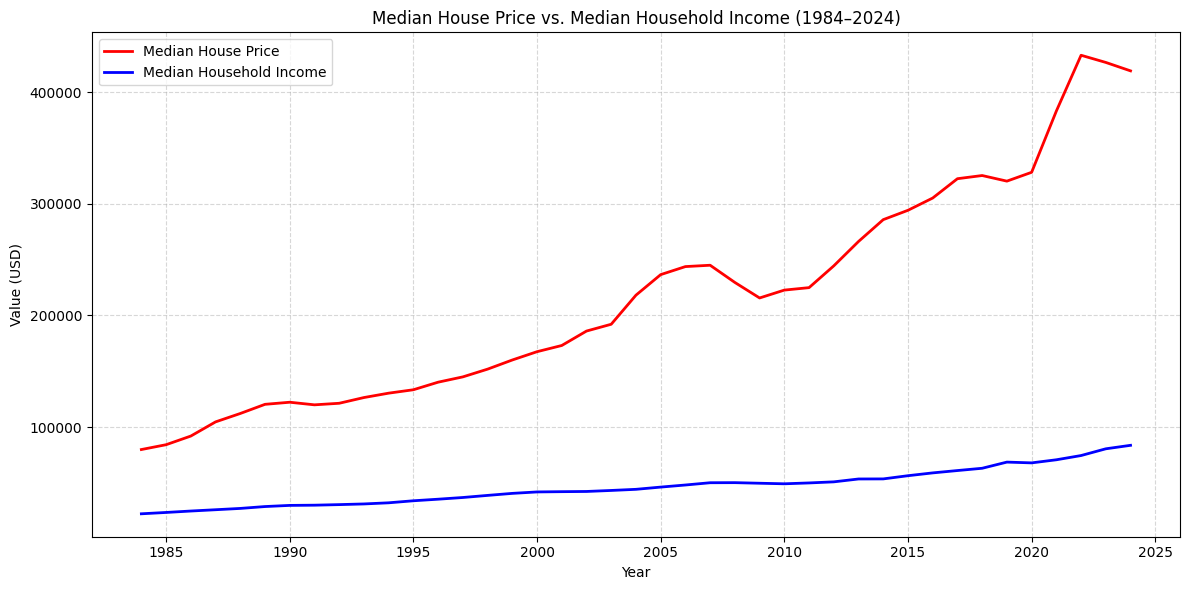

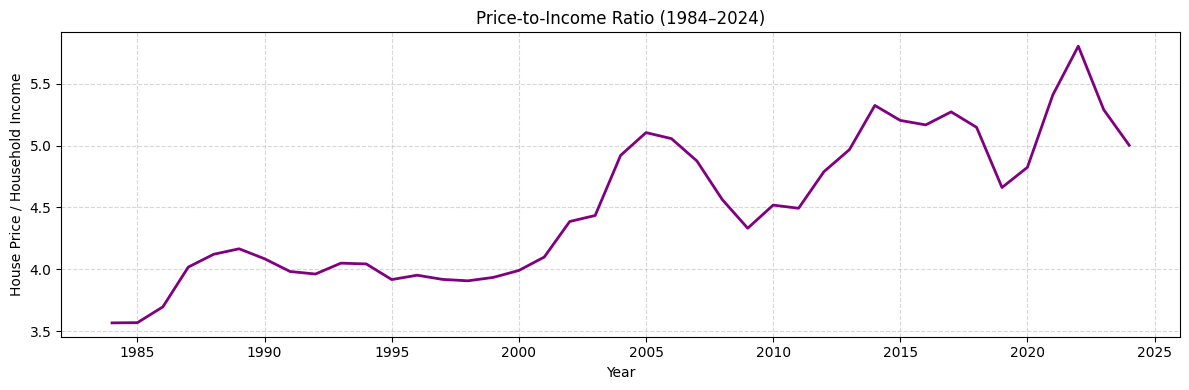

In [ ]:
# Load data
income = pd.read_csv("Median Household Income.csv")
house_price = pd.read_csv("Median House Price.csv")

# --- ONLY FIX: correct the column names ---
income = income.rename(columns={"Median HH Income": "Median Household Income"})
house_price = house_price.rename(columns={"Median House Price ": "Median House Price"})


# Merge datasets on Year
merged = income.merge(house_price, on="Year")

merged["Price_to_Income"] = (
    merged["Median House Price"] / merged["Median Household Income"]
)

# ---------------------------------------------
# Plot 1 — Same-axis comparison (clean + honest)
# ---------------------------------------------
plt.figure(figsize=(12, 6))

plt.plot(
    merged["Year"],
    merged["Median House Price"],
    label="Median House Price",
    color="red",
    linewidth=2
)

plt.plot(
    merged["Year"],
    merged["Median Household Income"],
    label="Median Household Income",
    color="blue",
    linewidth=2
)

plt.title("Median House Price vs. Median Household Income (1984–2024)")
plt.xlabel("Year")
plt.ylabel("Value (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

#############################################3

plt.figure(figsize=(12, 4))
plt.plot(
    merged["Year"],
    merged["Price_to_Income"],
    color="purple",
    linewidth=2
)

plt.title("Price-to-Income Ratio (1984–2024)")
plt.xlabel("Year")
plt.ylabel("House Price / Household Income")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
pip install plotly

In [ ]:
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
%matplotlib inline

HousingData = pd.read_csv("housing_clean.csv")
HouseholdIncomeData = pd.read_csv("Regression-Dataset-For-Household-Income-Analysis.cleaned.csv")


def assign_age_cohort(age):
    """Categorize ages into generational cohorts."""
    if pd.isna(age):
        return np.nan
    age = int(age)
    if 18 <= age <= 27:
        return "Gen Z (18–27)"
    elif 28 <= age <= 43:
        return "Millennial (28–43)"
    elif 44 <= age <= 59:
        return "Gen X (44–59)"
    elif age >= 60:
        return "Boomer+ (60+)"
    else:
        return "Under 18"

# Apply to household income dataset (which contains age info)
HouseholdIncomeData["age_cohort"] = HouseholdIncomeData["age"].apply(assign_age_cohort)



def calc_price_to_income(df, income_col, price_col):
    """
    Compute price-to-income ratio.
    Note: In HousingData, median_income is in units of 10,000 dollars.
    """
    df = df.copy()
    df["price_to_income_ratio"] = df[price_col] / (df[income_col] * 10000)
    # Clean up extreme outliers
    df = df[df["price_to_income_ratio"].between(df["price_to_income_ratio"].quantile(0.01),
                                                df["price_to_income_ratio"].quantile(0.99))]
    return df

# Apply to housing dataset
HousingData = calc_price_to_income(HousingData, "median_income", "median_house_value")


# Check price_to_income_ratio exists, if not create
if "price_to_income_ratio" not in HousingData.columns:
    HousingData["price_to_income_ratio"] = HousingData["median_house_value"] / (HousingData["median_income"] * 10000)

# Removing outliers (1st–99th percentile)
q_low, q_high = HousingData["price_to_income_ratio"].quantile([0.01, 0.99])
HousingData = HousingData.query("@q_low <= price_to_income_ratio <= @q_high")

# Plotly
fig1 = px.scatter_map(
    HousingData,
    lat="latitude",
    lon="longitude",
    color="price_to_income_ratio",
    color_continuous_scale=px.colors.sequential.Inferno[::-1],
    zoom=5,
    opacity=0.7,
    hover_data=["median_income", "median_house_value", "ocean_proximity"],
    title="California Housing Affordability Gradient (Price-to-Income Ratio)",
)

# --- Map style
fig1.update_layout(
    map_style="carto-positron",   # clean base map with light coastlines
    map_center={"lat": 36.5, "lon": -119.5},
    margin={"r":0,"t":50,"l":0,"b":0},
    title_font=dict(size=18, weight='bold'),
    coloraxis_colorbar=dict(title="Price-to-Income Ratio")
)

# Display in Notebook
fig1.show()


****Below is a screenshot of the visualization since you might not see the "legend" due to pdf formatting**

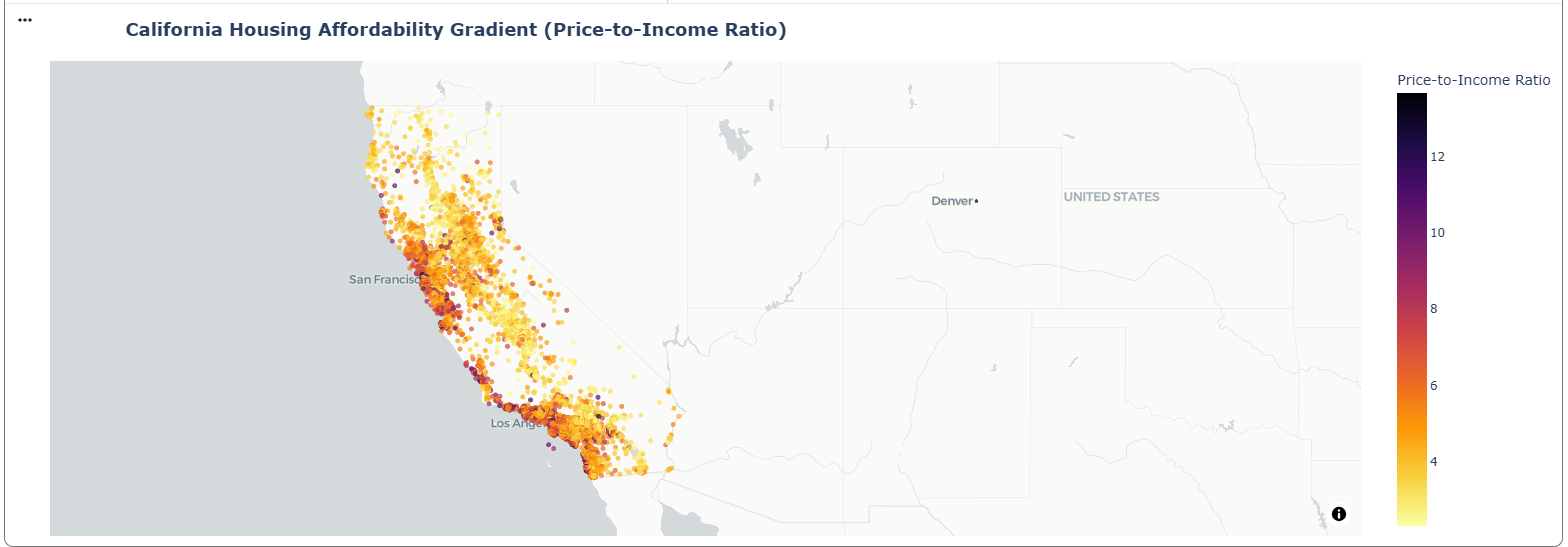


---

## **Additional Work**

---

For the additional work section, we have decided to create an additional visualization.

The following visualization explores household incomes for various household sizes.

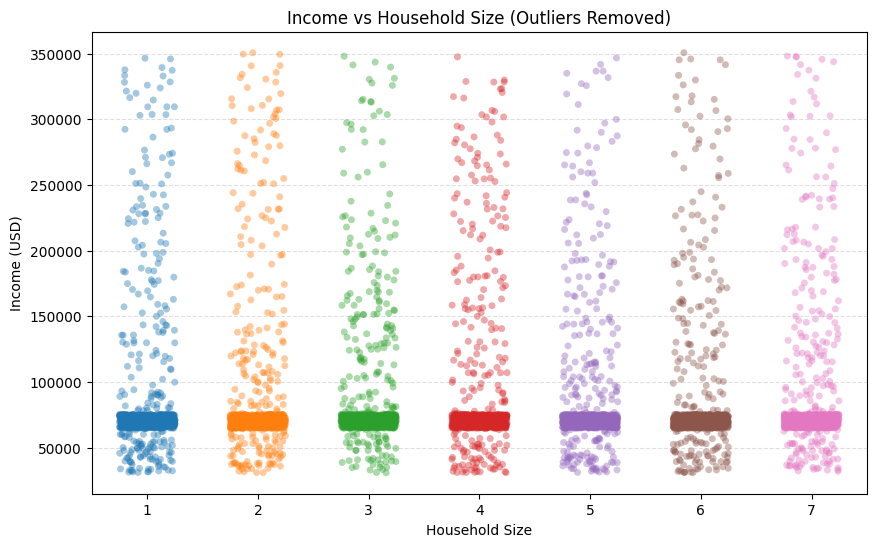

In [ ]:

# Load dataset
regression = pd.read_csv("Regression-Dataset-For-Household-Income-Analysis.cleaned.csv")

# -------------------------------------------
# Remove Top 5% of High-Income Outliers

cutoff = regression["income"].quantile(0.75)
filtered = regression[regression["income"] <= cutoff]

# -------------------------------------------
# Scatter Plot — Income vs Household Size

plt.figure(figsize=(10,6))
sns.stripplot(
    data=filtered,
    x="household_size",
    y="income",
    jitter=0.25,
    alpha=0.4,
    hue = "household_size",
    legend = False,
    palette="tab10"
)

plt.title("Income vs Household Size (Outliers Removed)")
plt.xlabel("Household Size")
plt.ylabel("Income (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Fix y-axis from scientific notation to full numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()



---

## **Gen AI Guidance**
---


The suggestions that Gen AI models provided in the last milestone were useful. We followed some of those to improve our project.

One of the suggestions was to consolidate affordability metrics, rather than examining income and house values separately. That is why we have visualizations that portray the price-to-income ratio.

Another suggestion for the visualizations was to stratify the analysis by subcategories to reveal subgroup differences, which is what we've done for the visualization in the additional work section. It helps us identify income levels for different household sizes, whether families earn more, and if larger families earn more to support themselves, among others. This helps us identify that incomes stay steady for larger households, resulting in less affordable housing.

Our first ML analysis performed slightly better than baseline so GenAI suggested that more accurately predicting affordability can be done by observing more unseen variables like geographic and economic conditions. Our second regression model performed much better than the baseline and we also had it rank the importance of each feature in its predictions to help us better understand what factors influenced home costs the most. We learned housing markets are highly predictable given income and location, suggesting that systemic geographic cost factors—not personal financial choices—are the primary drivers of housing unaffordability for young adults.

Some of the other suggestions didn't apply to our situation because ChatGPT simply didn't understand our datasets and requirements well enough and provided some improper suggestions.


---

## **Results**

---


Over the last 40 years, median US house prices and median US household incomes have not grown at the same pace.
The line chart shows a widening gap beginning in the late 1990s, accelerating during the 2000s housing boom, dipping in 2008, and then increasing sharply after 2020. The price-to-income ratio confirms this trend: affordability worsened significantly as the ratio climbed from ~3 in the 1980s to over 6 in the 2020s.

Understanding this is important as it connects to other trends: slowing wage growth, generational wealth inequality, and regional housing crises. Investigating this relationship helps quantify why homeownership, once considered a hallmark of the American middle class, has become out of reach for many families today despite overall economic growth.

Coastal regions like Los Angeles, San Francisco, and San Diego have been economic and cultural hubs with dense job markets, a variety of lifestyle amenities, and a limited housing supply. However, these advantages come with a steep affordability cost. By comparing median house value to median household income across thousands of tracts, the price-to-income ratio reveals where housing costs most exceed what residents can reasonably afford. The ratio for many people in the region reaches as high as 12, indicating that they have no choice but to buy such expensive homes on average salaries, as homes are becoming increasingly unaffordable.

The third visualization, in the additional work section, highlights how income varies across different household sizes.
Median income appears similar for households of all sizes. The mean and median hover at around 70k - 80k for all household sizes. This suggests that larger households experience stronger affordability pressure, as increasing dependents do not correspond proportionally to higher income.

Compared to a baseline that always predicts the average house value, our Random Forest (2nd) model substantially improves prediction accuracy, reducing RMSE from about \$114k to \$49k and MAE from about \$91k to \$31k. An R² of 0.82 indicates that the model explains roughly 82% of the variation in median house values, which is strong for housing data. Feature importance analysis shows that median income is the dominant predictor of house values, followed by location-related variables such as distance from the ocean and geographic coordinates. This indicates that median income and geographic factors together explain most of the variation in house prices, reinforcing the idea that location and earnings power are central to the affordability challenges faced by potential young homebuyers.

Homeownership has become less attainable for the average American. Wage stagnation and rising property costs are widening the gap. Data-driven insight like this helps policymakers target affordability reforms.

These insights emphasize the growing affordability crisis and regional economic disparities across the U.S